<a href="https://colab.research.google.com/github/Anshika91/Deep_Learning/blob/main/LeCun_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LeNet-5
Proposed by Lecun in 1989
Total layers are 7
Learnable layer=5
Convolutional layer =3
subsampling layer=2
Fully connected layer =2
with a softmax activation function/classifier.
LeNet is a earliest pretrained model and in research gradient based learning is applied .
this architecture is used to recognized handwritten and machine -printed characters.
the main reason behind this popularity is simple and straightforward.
LeCun applied Average pooling by this size of feature map is reduced by half and no.of channel is intact.



In [61]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import*
from keras.models import*
from keras import Sequential 
from keras.layers import Conv2D 
from keras.layers import Flatten
from keras.layers import AvgPool2D
from keras.layers import Dense
from keras.layers import Dropout

In [62]:
model=Sequential()

In [63]:
model.add(Conv2D(6,kernel_size = (5,5),activation = 'relu', input_shape = [32,32,1] , padding='valid'))
model.add(AvgPool2D(pool_size = 2))
model.add(Conv2D(16,kernel_size = (5,5), activation = 'relu',padding = 'valid'))
model.add(AvgPool2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [64]:
tf.random.set_seed(221)
np.random.seed(221)

In [65]:
data = tf.keras.datasets.fashion_mnist

In [66]:
(train_img,train_lbl),(test_img,test_lbl) = data.load_data()

In [67]:
len(train_img)

60000

In [68]:
len(test_img)

10000

In [69]:
train_img.shape

(60000, 28, 28)

In [70]:
test_img.shape

(10000, 28, 28)

In [71]:
train_img = train_img.reshape(60000,28,28,1)

In [72]:
#scale 
train_img = train_img/255.0

In [73]:
train_img = tf.image.pad_to_bounding_box(train_img,1,1,32,32)

In [74]:
test_img = test_img.reshape(10000,28,28,1)

In [75]:
#scale
test_img = test_img/255.0

In [76]:
test_img = tf.image.pad_to_bounding_box(test_img,1,1,32,32)

In [77]:
train_lbl_5 = (train_lbl == 5)

In [78]:
test_lbl_5 = (test_lbl == 5)

In [79]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'SGD', metrics ='accuracy')

In [80]:
history = model.fit(train_img,train_lbl,epochs=10,validation_data = (test_img,test_lbl))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8034 - accuracy: 0.7092 - val_loss: 0.6232 - val_accuracy: 0.7624
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5251 - accuracy: 0.8038 - val_loss: 0.5203 - val_accuracy: 0.8095
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4693 - accuracy: 0.8264 - val_loss: 0.4753 - val_accuracy: 0.8305
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4349 - accuracy: 0.8406 - val_loss: 0.4866 - val_accuracy: 0.8181
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4125 - accuracy: 0.8483 - val_loss: 0.4419 - val_accuracy: 0.8416
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3944 - accuracy: 0.8559 - val_loss: 0.4368 - val_accuracy: 0.8358
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3789 - accuracy: 0.8613 - val_loss: 0.3978 - val_accuracy:

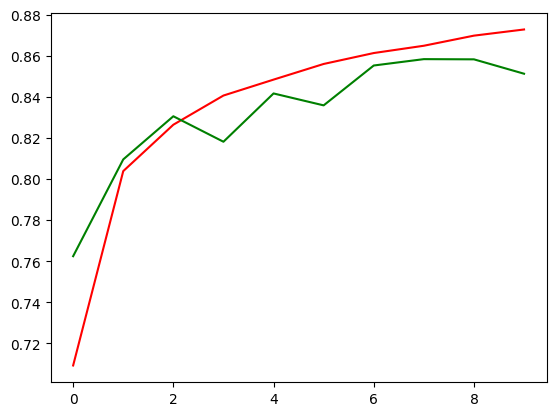

In [81]:
plt.plot(history.history['accuracy'],'r-')
plt.plot(history.history['val_accuracy'],'g-')
plt.show()

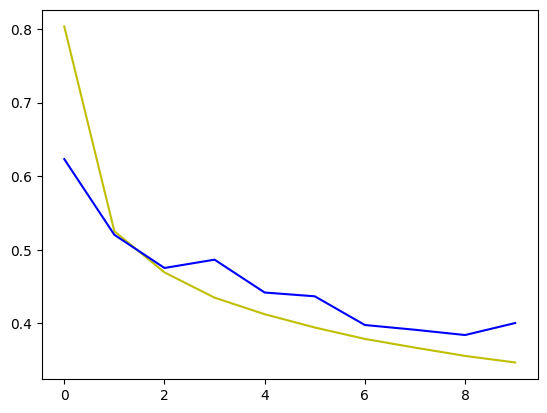

In [82]:
plt.plot(history.history['loss'],'y-')
plt.plot(history.history['val_loss'],'b-')
plt.show()

AlexNet proposed by chellapilla in 2006 was 4 times faster than the CPU It competed imageLarge Scale total layer=8
first 5 layers are convolutional and 3 layers fully connected activation function relu
multipe GPU's
overlapPooling means Pooling where stride value =1 
This model is used for transfer learning